<a href="https://colab.research.google.com/github/mweiher15/CollectiveIntelCapstone/blob/main/Comp440_WikipediaProjectStubs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 38.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=ee8c934b1c4bb0edd0e81f022424529c26aabf0081bc793d86def9623d3571d9
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


## Processing Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [ ]:
stub_df = pd.read_csv("/content/gdrive/MyDrive/stub_categories.csv")
stub_df

,page_id,revid,quality,enqual,qual_float,wiki_db,article_title,average_views,categories
0,1543,1146812165,Stub,Stub,0.166667,enwiki,Agapanthus africanus,55.0,['Plants']
1,1690,1147201305,Stub,Stub,0.166667,enwiki,Amati,100.0,['Musical Instruments']
2,1729,1147626291,Stub,Stub,0.166667,enwiki,Amyntas I of Macedon,42.0,"['Biography', 'Classical Greece and Rome', 'Gr..."
3,2719,1146266048,Stub,Stub,0.166667,enwiki,Abettor,33.0,"['Crime', 'Law']"
4,3234,1147433608,Stub,Stub,0.166667,enwiki,Archbishopric of Riga,24.0,"['Former countries', 'Latvia']"
...,...,...,...,...,...,...,...,...,...
64602,73595971,1150772812,Stub,Stub,0.166667,enwiki,2023 Garden Open,107.0,['Tennis']
64603,73595982,1150773125,Stub,Stub,0.166667,enwiki,2023 Savannah Challenger,98.0,['Tennis']
64604,73596005,1150774244,Stub,Stub,0.166667,enwiki,2023 Challenger AAT,93.0,['Tennis']
64605,73596021,1150774504,Stub,Stub,0.166667,enwiki,Skyline Regional Park,172.0,"['banner shell', 'Arizona', 'Geography', 'Prot..."


stub_df is dataframe with all stub articles in the english wikipedia, their corresponding average daily page views dating back to 2017, and a list of the wikiprojects they are associated with.

In [ ]:
sorted_stubs = stub_df.sort_values('average_views', ascending=False)
sorted_stubs

,page_id,revid,quality,enqual,qual_float,wiki_db,article_title,average_views,categories
60487,72677438,1147424883,Stub,Stub,0.166667,enwiki,UFC 287,12174.0,['Mixed martial arts']
58725,68718045,1148383735,Stub,Stub,0.166667,enwiki,Luther: The Fallen Sun,10311.0,['Film']
61084,73341190,1147212329,Stub,Stub,0.166667,enwiki,Paul Grant (actor),9197.0,"['Biography', 'United Kingdom']"
60643,72901167,1147915864,Stub,Stub,0.166667,enwiki,The Strays (film),8553.0,"['Horror', 'Film']"
56792,65011327,1146255774,Stub,Stub,0.166667,enwiki,Maid (miniseries),7097.0,"['banner shell', 'Television', 'United States']"
...,...,...,...,...,...,...,...,...,...
62081,73419153,1147931769,Stub,Stub,0.166667,enwiki,Why Are You So Noisy?,NaN,[]
62374,73434333,1147770077,Stub,Stub,0.166667,enwiki,Who Can Sail Without the Wind?,NaN,"['Sweden', 'Songs']"
63125,73493574,1148720243,Stub,Stub,0.166667,enwiki,OS/4,NaN,"['Computing', 'Software']"
64048,73548713,1149856095,Stub,Stub,0.166667,enwiki,Are Waitresses Safe?,NaN,['film']


In [ ]:
new_df = sorted_stubs[pd.isna(sorted_stubs['average_views']) == False]

new_df is a cleaned version of the stubs without the articles that have NaN average_views

In [ ]:
new_df

,page_id,revid,quality,enqual,qual_float,wiki_db,article_title,average_views,categories
60487,72677438,1147424883,Stub,Stub,0.166667,enwiki,UFC 287,12174.0,['Mixed martial arts']
58725,68718045,1148383735,Stub,Stub,0.166667,enwiki,Luther: The Fallen Sun,10311.0,['Film']
61084,73341190,1147212329,Stub,Stub,0.166667,enwiki,Paul Grant (actor),9197.0,"['Biography', 'United Kingdom']"
60643,72901167,1147915864,Stub,Stub,0.166667,enwiki,The Strays (film),8553.0,"['Horror', 'Film']"
56792,65011327,1146255774,Stub,Stub,0.166667,enwiki,Maid (miniseries),7097.0,"['banner shell', 'Television', 'United States']"
...,...,...,...,...,...,...,...,...,...
28696,19013734,1146340009,Stub,Stub,0.166667,enwiki,Łysołaje,1.0,['Poland']
28697,19013756,1146189892,Stub,Stub,0.166667,enwiki,Starościce,1.0,['Poland']
28698,19013760,1146337137,Stub,Stub,0.166667,enwiki,Wólka Łańcuchowska,1.0,['Poland']
54994,61448095,1148132530,Stub,Stub,0.166667,enwiki,Wojciech Tomasiewicz,1.0,"['Biography', 'Football', 'Poland']"


New_df has also been sorted, so we can see the stub articles that are getting the highest daily views on average. Later on, it will be clear that these are outliers!

## Looking at View Distribution

In [ ]:
# create bins for the page view data
bins = range(0, 13001, 100)

# use cut() to categorize the page views into bins
page_view_bins = pd.cut(new_df['average_views'], bins)

# count the number of articles in each bin
bin_counts = page_view_bins.value_counts()

# create a new DataFrame from the bin_counts Series
table_data = pd.DataFrame({
    'Page View Range': [str(bin) for bin in bin_counts.index],
    'Number of Articles': bin_counts.values
})

# display the table
print(table_data)

    Page View Range  Number of Articles
0          (0, 100]               60046
1        (100, 200]                2419
2        (200, 300]                 803
3        (300, 400]                 428
4        (400, 500]                 240
..              ...                 ...
125    (7100, 7200]                   0
126    (6800, 6900]                   0
127    (6700, 6800]                   0
128    (6400, 6500]                   0
129  (12900, 13000]                   0

[130 rows x 2 columns]


Looking at the distribution of page views across articles we can see that almost all of the articles, 60000 out of the total 64451, have an average daily view count of less than 100. 

  Page View Range  Number of Articles
0         (0, 10]               37695
1        (10, 20]                9701
2        (20, 30]                4398
3        (30, 40]                2583
4        (40, 50]                1774
5        (50, 60]                1187
6        (60, 70]                 970
7        (70, 80]                 716
8        (80, 90]                 555
9       (90, 100]                 467


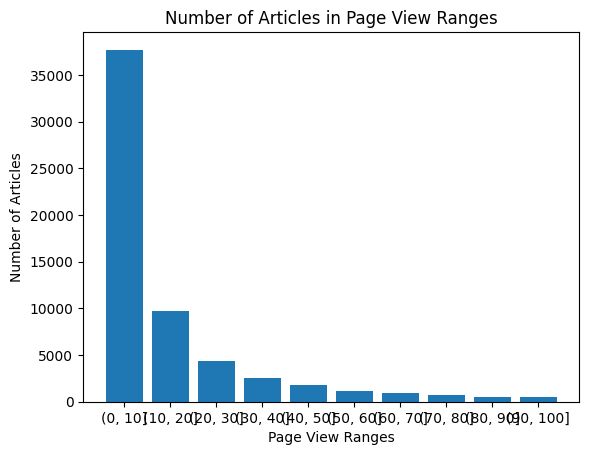

In [ ]:
# create bins for the page view data
bins = range(0, 101, 10)

# use cut() to categorize the page views into bins
page_view_bins = pd.cut(new_df['average_views'], bins)

# count the number of articles in each bin
bin_counts = page_view_bins.value_counts()

# create a new DataFrame from the bin_counts Series
table_data = pd.DataFrame({
    'Page View Range': [str(bin) for bin in bin_counts.index],
    'Number of Articles': bin_counts.values
})

# display the table
print(table_data)

#plot the data as a bar chart
plt.bar(x=[str(bin) for bin in bin_counts.index], height=bin_counts.values)
plt.xlabel('Page View Ranges')
plt.ylabel('Number of Articles')
plt.title('Number of Articles in Page View Ranges')
plt.show()

And of those 60k under 100, over half (37695) of the articles have an average daily view count of less than 10! That's a lot of articles that are getting not a lot of views! This mostly makes a lot of sense though due to the fact that stubs are the articles with the lowest quality and often have barely any information. This also means that stub articles are probably more likely to be on niche topics that most people are not looking up or interested in.

In [ ]:
cutViews_df = new_df[new_df['average_views'] > 10]

We decided to effectively cut the dataset in half and remove the ~ 30k articles with ten or less average daily views going into our next step of category analysis. This is because we wanted some sort of lower cutoff for demand, mostly so the many articles that are only getting 1 or 2 pageviews a day if any are not clouding our research into categories too much. Although we are looking at low quality articles, we at least want these to be articles that ~ some ~ people are visiting.

## Looking at Wikiproject Distribution

In [ ]:
cat_counts = cutViews_df['categories'].value_counts().sort_values(ascending=False)
cat_counts

[]                                                                        2675
['Biography']                                                             1507
['Film']                                                                   359
['Biography', 'India']                                                     314
['Biography', 'Football']                                                  294
                                                                          ... 
['Newspapers', 'Pennsylvania', 'Journalism']                                 1
['banner shell', 'Biography', 'Olympics', "Women's sports", 'Germany']       1
['Middle Ages', 'Military history', 'Spain']                                 1
['New Zealand', 'Australia']                                                 1
['Biography', 'Internet', 'Illinois', 'Women']                               1
Name: categories, Length: 10851, dtype: int64

In [ ]:
better_df = cutViews_df[cutViews_df['categories'] != '[]']
counts = better_df['categories'].value_counts().sort_values(ascending=False)
counts 

['Biography']                                                             1507
['Film']                                                                   359
['Biography', 'India']                                                     314
['Biography', 'Football']                                                  294
['Songs']                                                                  246
                                                                          ... 
['Newspapers', 'Pennsylvania', 'Journalism']                                 1
['banner shell', 'Biography', 'Olympics', "Women's sports", 'Germany']       1
['Middle Ages', 'Military history', 'Spain']                                 1
['New Zealand', 'Australia']                                                 1
['Biography', 'Internet', 'Illinois', 'Women']                               1
Name: categories, Length: 10850, dtype: int64

This shows counts of grouped wikiprojects (we removed the articles that aren't part of any wikiprojects)

In [ ]:
counts = counts.to_frame(name = "num_articles")
over_one = counts[counts["num_articles"] > 50]
top_combined = over_one.head(20)

In [ ]:
top_combined

,num_articles
['Biography'],1507
['Film'],359
"['Biography', 'India']",314
"['Biography', 'Football']",294
['Songs'],246
['Video games'],194
['Albums'],192
"['Biography', 'Women']",172
['India'],140
['Television'],137


Because most articles are connected with multiple Wikiprojects, we wanted to see the counts of articles associated projects in list form before looking at the counts for individual projects. This is a good way to get more specific information on article category. Because not only can we observe that biography is a popular category for stubs, but that specifically Biographies of Indian people are appear quite a bit comparatively.

<Axes: >

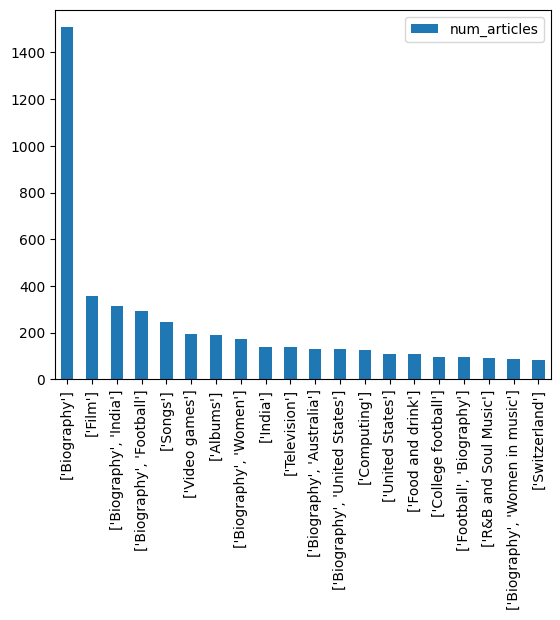

In [ ]:
top_combined.plot(kind='bar')

The wikiproject Biography has the most articles in it by far, after doing some manual investigating of top stub articles we did actually find out that this particular wikiproject is actually split into 15 subprojects that are not included in our data. So, articles won't just be part of the Biography wikiproject but "Biography - Actors and Filmakers" or "Biography - Sports and Games." This is kind of relflected when we look at the counts for specific combinations of wikiprojects, where we see that the Biography project appears 6 other times in the top 20 in combination with various other projects such as "India", "Football" and "Women." Because Biography is such a broad and large category it is useful to see the counts for the wikiprojects that are commonly grouped together like this, because it helps to break up the Biography wikiproject a little bit.

In [ ]:
biography_df = counts[counts.index.str.contains("Biography")]
print("Length of all groupings: ", len(counts))
print("Length with only Biographies: ", len(biography_df))
biography_df.head(20)

Length of all groupings:  10850
Length with only Biographies:  4740


,num_articles
['Biography'],1507
"['Biography', 'India']",314
"['Biography', 'Football']",294
"['Biography', 'Women']",172
"['Biography', 'Australia']",132
"['Biography', 'United States']",129
"['Football', 'Biography']",98
"['Biography', 'Women in music']",86
"['Biography', 'Canada']",65
"['Biography', 'College football', 'National Football League']",63


This made us want to only look at groupings that contain Biography! We found that out of the total 10,850 Wikiproject combinations, Biography appears in 4,740! This is almost half.

In [ ]:
import pycountry
import re


# List of country names
countries = [country.name for country in pycountry.countries]

# Regular expression that matches any of the country names
regex = r"\b(" + "|".join(re.escape(c) for c in countries) + r")\b"

# Select the rows in the counts DataFrame that contain a country name
biography_df = counts[counts.index.str.contains(regex)]
biography_df


<ipython-input-22-5a49e42731da>:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  biography_df = counts[counts.index.str.contains(regex)]


,num_articles
"['Biography', 'India']",314
['India'],140
"['Biography', 'Australia']",132
"['Biography', 'United States']",129
['United States'],109
...,...
"['Poland', 'Law']",1
"['Football', 'Biography', 'Indonesia']",1
"['banner shell', 'Biography', 'Olympics', ""Women's sports"", 'Germany']",1
"['Middle Ages', 'Military history', 'Spain']",1


After looking closer at Biogrophies, we got curious about other common Wikiproject categories. We noticed that wikiprojects named after countries seem to be very common, so we wanted to look more into that as well. The code above shows how many articles belong to the wiki project that is named as a country (any country). The fact that more than a half of stub articles (6351) belong to a very specific context of one country and not a universal topic.

In [ ]:
def parse_category(category_str):
  """This takes a string in 'list' format and returns it as an actual list object"""
  category_list = ast.literal_eval(category_str)
  return category_list

In [ ]:
better_df['categories'] = better_df['categories'].apply(parse_category)

<ipython-input-24-699b90aa8990>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  better_df['categories'] = better_df['categories'].apply(parse_category)


We realized that the wikiproject "lists" in the dataframe are actually strings, so this converts them back into actual lists

In [ ]:
explode_df = better_df.explode('categories')

In [ ]:
cat_counts = explode_df['categories'].value_counts().sort_values(ascending=False)
cat_counts = cat_counts.to_frame(name = "num_articles")
cat_counts = cat_counts.drop(index="banner shell")
cat_counts = cat_counts.drop(index="Banner Shell")

cat_counts shows how many articles are in each individual wikiproject, this also means that some articles will be "counted" multiple times because they go towards the count of each project they are part of

<Axes: >

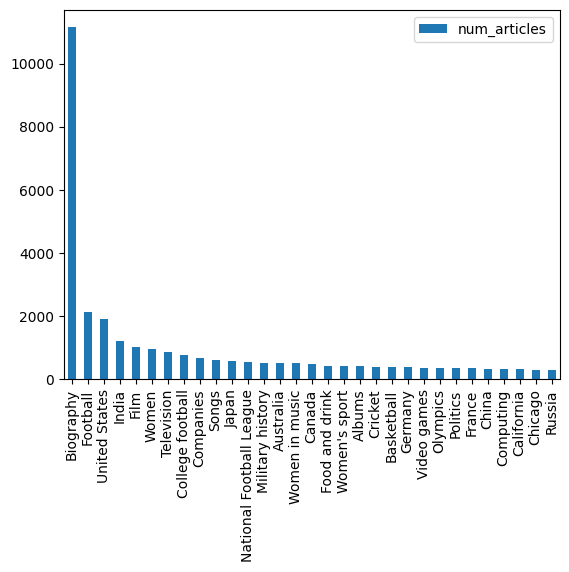

In [ ]:
sliced_counts = cat_counts[cat_counts["num_articles"] > 300]
sliced_counts.plot(kind='bar')

This shows the wikiprojects that have over 300 associated stubs

In [ ]:
top20 = sliced_counts.head(20)
top20

,num_articles
Biography,11144
Football,2129
United States,1914
India,1229
Film,1033
Women,976
Television,880
College football,766
Companies,691
Songs,599


<Axes: >

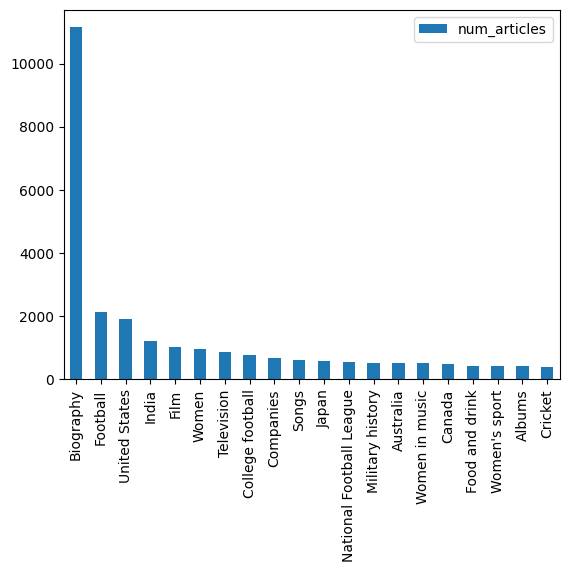

In [ ]:
top20.plot(kind='bar')

This shows the top 20 wikiprojects with the most associated stub articles. The top 5 of these are Biography, Football, United States, India, and Film. And once again Biography is ahead by a lot! This is explained by comments above about how Biography has subprojects.

In [ ]:
explode_df_views = explode_df.groupby("categories")["average_views"].sum()
explode_df_articles = explode_df.groupby("categories").size()
avg_views = explode_df_views / explode_df_articles
sorted_cats = avg_views.to_frame(name="average_views")
sorted_cats = sorted_cats.sort_values(by="average_views", ascending=False)

In [ ]:
top20_views = sorted_cats.head(20)
top20_views

,average_views
categories,
TikTok,3349.500000
YouTube,1526.900000
Mixed martial arts,1372.952381
USA,1022.666667
Tool,872.000000
Adele,695.000000
Star Trek,673.846154
Pashtun,623.666667
Jennifer Lopez,618.000000


<Axes: xlabel='categories'>

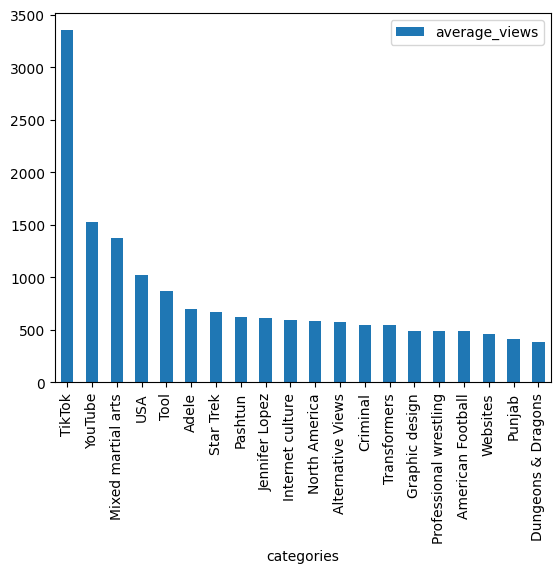

In [ ]:
top20_views.plot(kind='bar')

We were then interested in looking at top wikiprojects based on the page views of the stubs associated with them and the results are quite suprising! We were expecting Biography to be on top again, but actually TikTok and then YouTube are the wikiprojects whose stubs receive the highest daily views on average. This may be because TikTok and Youtube and social media culture in general are hot topics as of the last few years, but many people don't necessarily take them seriously. So, it makes sense that there is a demand for information on things related to social media, but there isn't necessarily as much of an academic interest so there aren't really good quality articles yet. 

In [ ]:
sorted_cats.to_csv("category_view_counts.csv", index = False)

In [ ]:
explode_df.to_csv("exploded_df.csv", index = False)